<a href="https://colab.research.google.com/github/PraPaudel/BrainPy/blob/master/PraveenExperiments_googledrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##notebook to analyze the basic information of the data praveen has collected and jotted in the google spreadsheet

Import PraveenExperiments

In [ ]:
!pip install --upgrade gspread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

wb = gc.open_by_key('1ebEFljk38J8pIjf6B_8GUqc7H9-AaDuKTef3XCELp68')




lets import some modules

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

lets load the second sheet from PraveenExperiment and create a pandas df

In [ ]:
wsSocialBehavior = wb.worksheet('SocialBehavior')

# get_all_values gives a list of rows.
rowsSB = wsSocialBehavior.get_all_values()

# Separate the first row to use as column names.
column_names = rowsSB[0]

# Create the DataFrame, skipping the first row.
df = pd.DataFrame(rowsSB[1:], columns=column_names)


In [ ]:
df

,,Animal,Genotype/ virus,Implant,Session,session basepath,Date recording started,Useful session after applying filter?,Session Highlights,Behavior task,,Stimuli,Manipulation,PreProcess Session,Phy2,DLC,Behvaior score,,Comments,additional notes
0,N=?,,,,recording day,,,filter = > 5sec social intercation/chamber/epoch,,,maze type,,,,,,Displaced DI,Novel DI,,
1,1,SM40,hybrid(Amigo-cre/B6 x FVB),64ch neuronexus dHPC & 3 wires vHPC,searching ROI,,05/27/2022,,good CA2,,na,na,,na,na,na,na,na,"dHPC: 1/8 cc turn, 1/8cc turn, 1/8 cc turn; vH...",1 full turn = ~ 300 um; camdridge neurotech na...
2,1,SM40,hybrid(Amigo-cre/B6 x FVB),64ch neuronexus dHPC & 3 wires vHPC,searching ROI,,05/28/2022,,,,na,na,,na,na,na,na,na,dHPC: 1/8 cc turn,
3,1,SM40,hybrid(Amigo-cre/B6 x FVB),64ch neuronexus dHPC & 3 wires vHPC,searching ROI,,05/30/2022,,,,na,na,,na,na,na,na,na,"dHPC: 1/8 cc turn, 1/8 cc turn, 1/8 cc turn; v...",
4,1,SM40,hybrid(Amigo-cre/B6 x FVB),64ch neuronexus dHPC & 3 wires vHPC,searching ROI,,05/31/2022,,,,na,na,,na,na,na,na,na,"dHPC: 1/8 cc turn, 1/4 cc turn, 1/4 cc turn; v...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,,,,,,,,,,,,,,,,,,,,
93,,,,,,,,,,,,,,,,,,,,
94,,,,,,,,,,,,,,,,,,,,
95,12,heraclitus,hybrid(B6 x FVB),"4x bundles of six wires in mPFC, left dHPC, ri...",day01,Y:\Data\FieldProject\FieldMission2\before_fiel...,05/23/2023,,good dorsal and ventral ripples. has mpfc as w...,,social_plusmaze,C57 male,,,,,,,,


In [10]:
# First replace spaces in the column names with underscores
df.columns = df.columns.str.replace(' ', '_', regex=True)

# Then, convert all characters to lower case
df.columns = df.columns.str.lower()

# Replace special characters like "/" with underscores
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

# Print out the new column names
print(df.columns)
df

Index(['_', 'animal_', 'genotype__virus', 'implant', 'session',
       'session_basepath', 'date_recording_started',
       'useful_session_after_applying_filter_', 'session_highlights',
       'behavior_task', '', 'stimuli', 'manipulation', 'preprocess_session',
       'phy2', 'dlc', 'behvaior_score', '', 'comments', 'additional_notes'],
      dtype='object')


,_,animal_,genotype__virus,implant,session,session_basepath,date_recording_started,useful_session_after_applying_filter_,session_highlights,behavior_task,,stimuli,manipulation,preprocess_session,phy2,dlc,behvaior_score,,comments,additional_notes
0,N=?,,,,recording day,,,filter = > 5sec social intercation/chamber/epoch,,,maze type,,,,,,Displaced DI,Novel DI,,
1,1,SM40,hybrid(Amigo-cre/B6 x FVB),64ch neuronexus dHPC & 3 wires vHPC,searching ROI,,05/27/2022,,good CA2,,na,na,,na,na,na,na,na,"dHPC: 1/8 cc turn, 1/8cc turn, 1/8 cc turn; vH...",1 full turn = ~ 300 um; camdridge neurotech na...
2,1,SM40,hybrid(Amigo-cre/B6 x FVB),64ch neuronexus dHPC & 3 wires vHPC,searching ROI,,05/28/2022,,,,na,na,,na,na,na,na,na,dHPC: 1/8 cc turn,
3,1,SM40,hybrid(Amigo-cre/B6 x FVB),64ch neuronexus dHPC & 3 wires vHPC,searching ROI,,05/30/2022,,,,na,na,,na,na,na,na,na,"dHPC: 1/8 cc turn, 1/8 cc turn, 1/8 cc turn; v...",
4,1,SM40,hybrid(Amigo-cre/B6 x FVB),64ch neuronexus dHPC & 3 wires vHPC,searching ROI,,05/31/2022,,,,na,na,,na,na,na,na,na,"dHPC: 1/8 cc turn, 1/4 cc turn, 1/4 cc turn; v...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,,,,,,,,,,,,,,,,,,,,
93,,,,,,,,,,,,,,,,,,,,
94,,,,,,,,,,,,,,,,,,,,
95,12,heraclitus,hybrid(B6 x FVB),"4x bundles of six wires in mPFC, left dHPC, ri...",day01,Y:\Data\FieldProject\FieldMission2\before_fiel...,05/23/2023,,good dorsal and ventral ripples. has mpfc as w...,,social_plusmaze,C57 male,,,,,,,,


In [11]:
df.session_basepath.unique

<bound method Series.unique of 0                                                      
1                                                      
2                                                      
3                                                      
4                                                      
                            ...                        
92                                                     
93                                                     
94                                                     
95    Y:\Data\FieldProject\FieldMission2\before_fiel...
96    Y:\Data\FieldProject\FieldMission2\before_fiel...
Name: session_basepath, Length: 97, dtype: object>

lets read another sheet and count the numbers of units

In [16]:
wsSocialBehavior2 = wb.worksheet('Analysis')

# get_all_values gives a list of rows.
rowsSB = wsSocialBehavior2.get_all_values()

# Separate the first row to use as column names.
column_names = rowsSB[0]

# Create the DataFrame, skipping the first row.
df2 = pd.DataFrame(rowsSB[1:], columns=column_names)

In [17]:
# Convert the 'units_per_session' column to a numeric format, and replace non-numeric values with NaN
df2['units_per_session'] = pd.to_numeric(df2['units_per_session'], errors='coerce')

# Remove any rows that contain NaN values in the 'units_per_session' column
df2 = df2.dropna(subset=['units_per_session'])



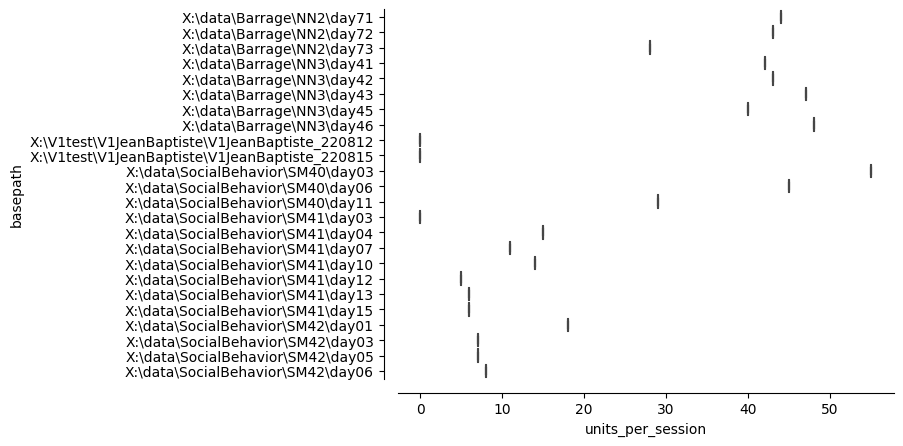

In [19]:
#sns.set_theme(style="ticks", palette="pastel")


sns.boxplot(y="basepath", x="units_per_session",
            data=df2, orient = "h")
sns.despine(offset=10)